In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING THE LIBRARIES :-

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

READING THE DATASET :-

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Saran/train_u6lujuX_CVtuZ9i.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.drop('Loan_ID',axis=1,inplace=True)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
cat_cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])

for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())

In [10]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
for col in cat_cols:
  print(col)
  print(df[col].unique())
  print('\n')

Gender
['Male' 'Female']


Married
['No' 'Yes']


Dependents
['0' '1' '2' '3+']


Education
['Graduate' 'Not Graduate']


Self_Employed
['No' 'Yes']


Property_Area
['Urban' 'Rural' 'Semiurban']


Loan_Status
['Y' 'N']




HANDLING CATEGORICAL VALUES :-

In [12]:
df.Gender.replace(['Male','Female'],[0,1],inplace=True)

In [13]:
df.Married.replace(['No','Yes'],[0,1],inplace=True)

In [14]:
df.Dependents = df.Dependents.str.replace('+','')

In [15]:
df.Education.replace(['Graduate','Not Graduate'],[0,1],inplace=True)

In [16]:
df.Self_Employed.replace(['No','Yes'],[0,1],inplace=True)

In [17]:
df.Property_Area.replace(['Urban','Rural', 'Semiurban'],[0,1,2],inplace=True)

In [18]:
df.Loan_Status.replace(['Y','N'],[1,0],inplace=True)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,1


In [20]:
for col in cat_cols:
  df[col] = df[col].astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [22]:
from imblearn.combine import SMOTETomek

smote = SMOTETomek()

x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

x_bal,y_bal = smote.fit_resample(x,y)

print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    358
0    358
Name: Loan_Status, dtype: int64


**EDA - EXPLORATORY DATA ANALYSIS :-**

In [23]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.050489,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


UNIVARIATE ANALYSIS :-

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

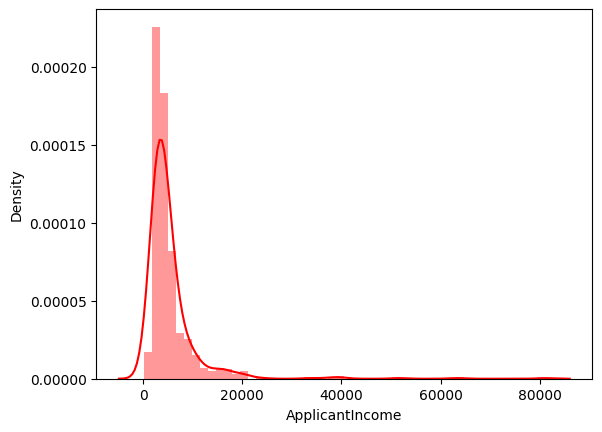

In [24]:
sns.distplot(df['ApplicantIncome'], color='r')

<Axes: xlabel='Credit_History', ylabel='Density'>

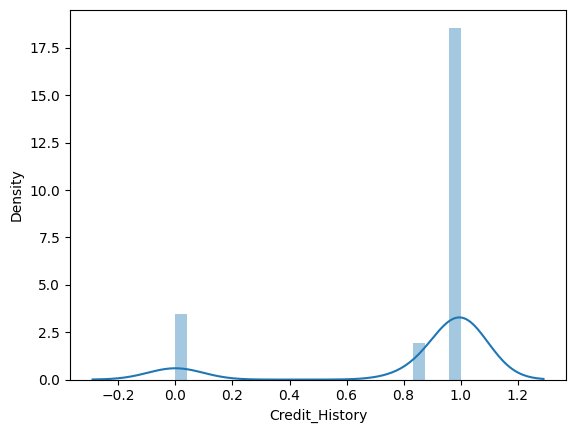

In [25]:
sns.distplot(df['Credit_History'])

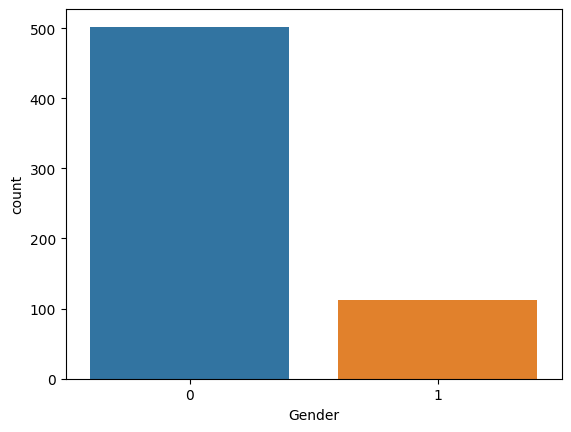

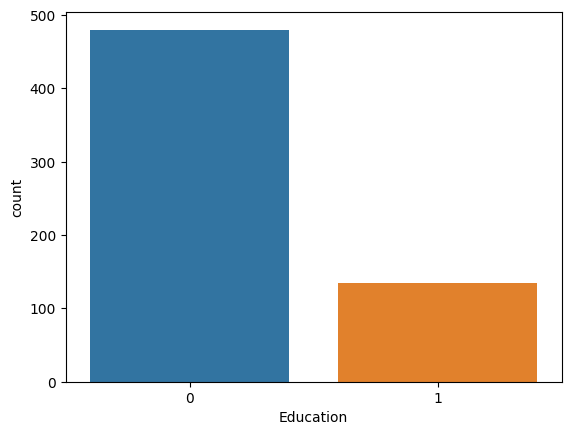

In [26]:
sns.countplot(df,x='Gender')
plt.xlabel('Gender')
plt.show()
sns.countplot(df,x='Education')
plt.xlabel('Education')
plt.show()

<Axes: xlabel='Married', ylabel='count'>

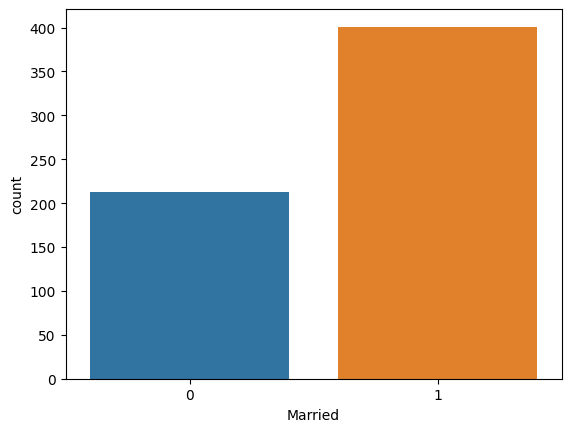

In [27]:
sns.countplot(df,x='Married')

BIVARIATE ANALYSIS :-

<Axes: xlabel='Property_Area', ylabel='count'>

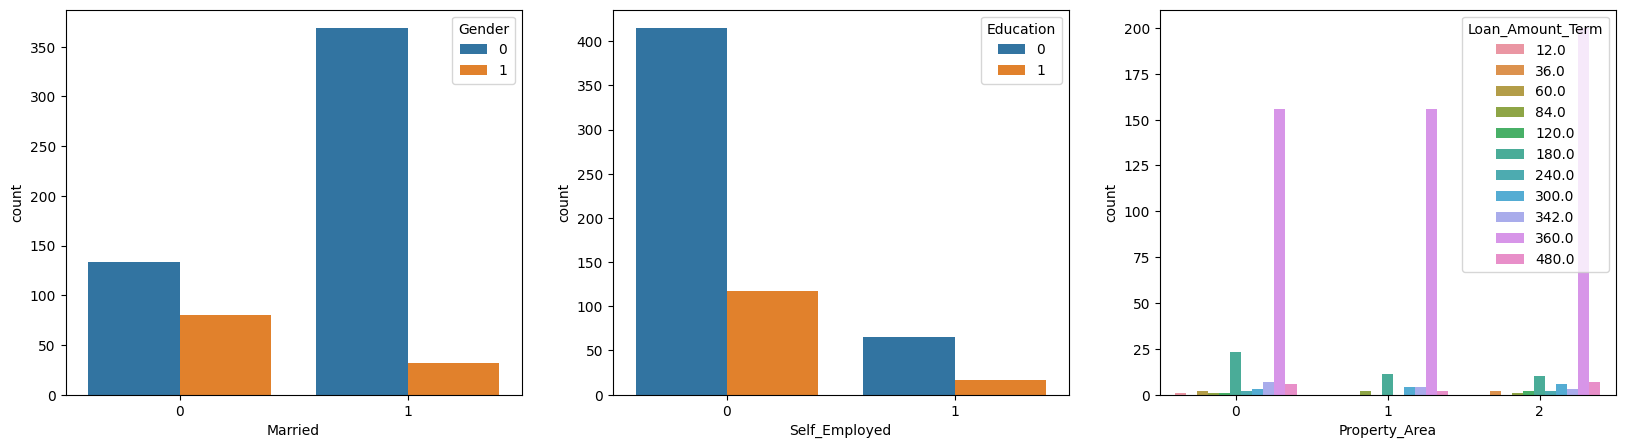

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x= 'Married', hue = "Gender", data = df)
plt.subplot(1,3,2)
sns.countplot(x = 'Self_Employed', hue = "Education", data = df)
plt.subplot(1,3,3)
sns.countplot(x= 'Property_Area', hue = "Loan_Amount_Term", data =df)

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

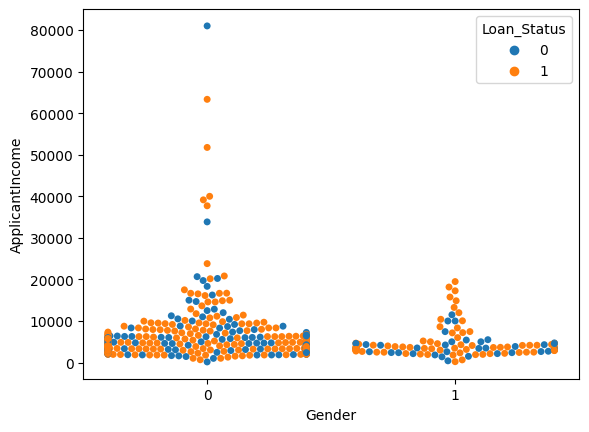

In [29]:
sns.swarmplot(x='Gender', y='ApplicantIncome', hue = "Loan_Status", data = df)

SCALING THE DATA :-

In [30]:
scaler = StandardScaler()
x_bal = scaler.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal,columns=scaler.get_feature_names_out())
x_bal.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.441956,-1.137924,-0.705071,-0.475423,-0.334367,0.152709,-0.434132,0.071120,0.280415,0.58471,-1.102249
1,-0.441956,0.878793,0.357731,-0.475423,-0.334367,-0.090557,-0.041650,-0.169960,0.280415,0.58471,0.123233
2,-0.441956,0.878793,-0.705071,-0.475423,2.990726,-0.394735,-0.434132,-0.981758,0.280415,0.58471,-1.102249
3,-0.441956,0.878793,-0.705071,2.103388,-0.334367,-0.474863,0.179576,-0.274708,0.280415,0.58471,-1.102249
4,-0.441956,-1.137924,-0.705071,-0.475423,-0.334367,0.181724,-0.434132,0.000256,0.280415,0.58471,-1.102249


SPLITTING THE DATA INTO TRAINING AND TESTTING DATA :-

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal, test_size=0.33)
print(x_train.shape,x_test.shape)

(479, 11) (237, 11)


**MODEL BUILDING :-**

In [32]:
def fit_model(model,name):
  model.fit(x_train,y_train)

  y_pred = model.predict(x_train)
  print('training accuracy of ',name,' : ',accuracy_score(y_pred,y_train))

  y_pred = model.predict(x_test)
  print('testing accuracy of ',name,' : ',accuracy_score(y_pred, y_test))

  plt.figure(figsize=(4,2))
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.show()

  print(classification_report(y_test,y_pred))

training accuracy of  DTC  :  1.0
testing accuracy of  DTC  :  0.7679324894514767


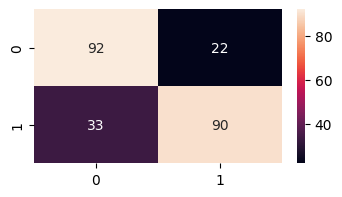

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       114
           1       0.80      0.73      0.77       123

    accuracy                           0.77       237
   macro avg       0.77      0.77      0.77       237
weighted avg       0.77      0.77      0.77       237



In [33]:
dtc = DecisionTreeClassifier()
fit_model(dtc,"DTC")

training accuracy of  RFC  :  1.0
testing accuracy of  RFC  :  0.8523206751054853


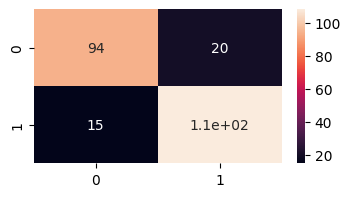

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       114
           1       0.84      0.88      0.86       123

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237



In [34]:
rfc = RandomForestClassifier()
fit_model(rfc,"RFC")

training accuracy of  KNN  :  0.824634655532359
testing accuracy of  KNN  :  0.7468354430379747


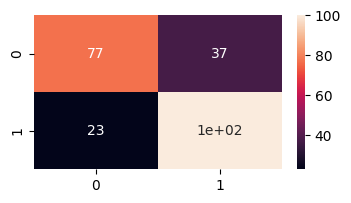

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       114
           1       0.73      0.81      0.77       123

    accuracy                           0.75       237
   macro avg       0.75      0.74      0.74       237
weighted avg       0.75      0.75      0.75       237



In [35]:
knn = KNeighborsClassifier()
fit_model(knn,'KNN')

training accuracy of  XGB  :  1.0
testing accuracy of  XGB  :  0.8734177215189873


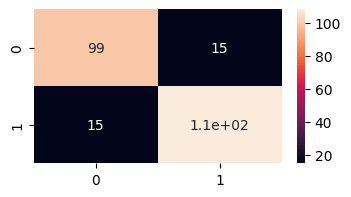

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       114
           1       0.88      0.88      0.88       123

    accuracy                           0.87       237
   macro avg       0.87      0.87      0.87       237
weighted avg       0.87      0.87      0.87       237



In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
fit_model(xgb,'XGB')

In [37]:
ann = Sequential()
ann.add(Dense(units=12,activation='relu'))
ann.add(Dense(units=24,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 75ms/step - loss: 0.7652 - accuracy: 0.3708 - val_loss: 0.7232 - val_accuracy: 0.4271
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7517 - accuracy: 0.3812 - val_loss: 0.7183 - val_accuracy: 0.4479
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7388 - accuracy: 0.4178 - val_loss: 0.7138 - val_accuracy: 0.4167
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7280 - accuracy: 0.4439 - val_loss: 0.7099 - val_accuracy: 0.4375
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.7166 - accuracy: 0.4909 - val_loss: 0.7057 - val_accuracy: 0.4688
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7073 - accuracy: 0.5091 - val_loss: 0.7019 - val_accuracy: 0.4688
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.6985 - accuracy: 0.5274 - val_loss: 0.6981 - val_accuracy: 0.5208
Epoch 8/100
4/4 [===

In [38]:
y_pred = ann.predict(x_train)
y_pred = y_pred > 0.5
print('training accuracy of ANN : ',accuracy_score(y_pred,y_train))

y_pred = ann.predict(x_test)
y_pred = y_pred > 0.5

print('testing accuracy of ANN : ',accuracy_score(y_pred, y_test))

15/15 [==============================] - 0s 1ms/step
training accuracy of ANN :  0.7828810020876826
8/8 [==============================] - 0s 2ms/step
testing accuracy of ANN :  0.7848101265822784


***HYPER PARAMETER TUNING:-***

In [39]:
from sklearn.model_selection import GridSearchCV 
params = {
    'criterion' :['gini','entropy'],
    'max_depth' :[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
gcv = GridSearchCV(DecisionTreeClassifier(),params,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

training accuracy of  DTC after tuning  :  0.8121085594989561
testing accuracy of  DTC after tuning  :  0.7637130801687764


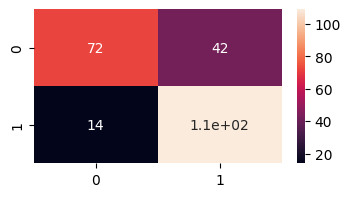

              precision    recall  f1-score   support

           0       0.84      0.63      0.72       114
           1       0.72      0.89      0.80       123

    accuracy                           0.76       237
   macro avg       0.78      0.76      0.76       237
weighted avg       0.78      0.76      0.76       237



In [51]:
dtc2 = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=4,min_samples_split=10)
fit_model(dtc2,'DTC after tuning')

In [41]:
parameters = {
                'n_estimators' :[1,20,30,55,68,74,90,120,115],
                 'criterion' :['gini','entropy'],
                  'max_features' : [ "sqrt" , "log2"],
              'max_depth' :[2,5,8,10]
}
rcv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameters,cv=10,n_iter=4)
rcv.fit(x_train,y_train)
rcv.best_params_

{'n_estimators': 90,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

training accuracy of  RFC ( after tuning )   :  0.9373695198329853
testing accuracy of  RFC ( after tuning )   :  0.8270042194092827


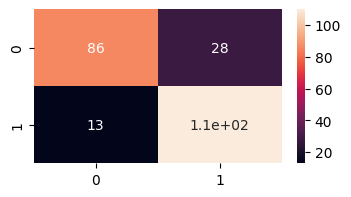

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       114
           1       0.80      0.89      0.84       123

    accuracy                           0.83       237
   macro avg       0.83      0.82      0.83       237
weighted avg       0.83      0.83      0.83       237



In [50]:
rfc2 = RandomForestClassifier(n_estimators=90,max_features='log2',max_depth=8,criterion='gini')
fit_model(rfc2,'RFC ( after tuning ) ')

In [43]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

g2 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

g2.fit(x_train, y_train)

print( g2.best_params_)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


training accuracy of  KNN (after tuning)  :  1.0
testing accuracy of  KNN (after tuning)  :  0.810126582278481


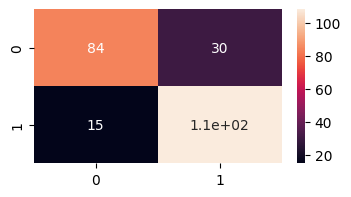

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       114
           1       0.78      0.88      0.83       123

    accuracy                           0.81       237
   macro avg       0.82      0.81      0.81       237
weighted avg       0.81      0.81      0.81       237



In [49]:
knn2 = KNeighborsClassifier(n_neighbors=5,p=1,weights='distance')
fit_model(knn2,'KNN (after tuning)')

In [45]:
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}
g = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)

g.fit(x_train, y_train)

g.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}

training accuracy of  XGB (after tuning)  :  1.0
testing accuracy of  XGB (after tuning)  :  0.8649789029535865


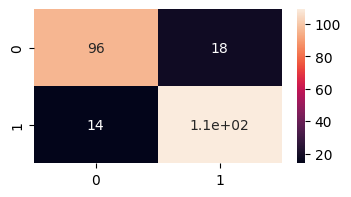

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       114
           1       0.86      0.89      0.87       123

    accuracy                           0.86       237
   macro avg       0.87      0.86      0.86       237
weighted avg       0.87      0.86      0.86       237



In [48]:
xgb2 = XGBClassifier(learning_rate = 0.2,max_depth=5,n_estimators = 100)
fit_model(xgb2,'XGB (after tuning)')

SAVING THE MODEL :-

In [47]:
pickle.dump(xgb2,open('xgb.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))